In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('C:/Users/Pranay/Downloads/activity.csv')

In [3]:
data.head()           #Dataset with 1 training feature and 1 output variable

,Acc (vertical),LyingDown
0,96.229,0
1,84.746,0
2,82.449,0
3,106.560,0
4,80.152,0


In [424]:
X=data['Acc (vertical)']
Y=data['LyingDown']
X_train=X[0:345]
Y_train=Y[0:345]
X_test=X[345:]
Y_test=Y[345:]
X_train=np.array(X_train).reshape(1,345)
Y_train=np.array(Y_train).reshape(1,345)
X_test=np.array(X_test).reshape(1,149)
Y_test=np.array(Y_test).reshape(1,149)

In [425]:
scaler=MinMaxScaler()
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [426]:
X_train=scaler.fit_transform(X_train.T).T     #Scaling all training examples
X_test=scaler.fit_transform(X_test.T).T

In [427]:
m=X_train.shape[1]  #Number of training examples
input_feat=1        #Number of input features  
N=4                 #Number of nodes in hidden layer

In [524]:
alpha=0.001

In [681]:
W1=np.random.rand(N,input_feat)*0.01
b1=np.random.rand(N,1)
Z1=np.zeros([N,m])
A1=np.zeros([N,m])
W2=np.random.rand(1,N)*0.01
b2=np.random.rand(1,1)
Z2=np.zeros([1,m])
A2=np.zeros([1,m])
Dz2=np.zeros([1,m])
Dw2=np.zeros([1,N])
Db2=np.zeros([1,1])
dw1=np.zeros([N,input_feat])
db1=np.zeros([N,1])
G1_prime=np.zeros([4,4])

In [673]:
W1_initial=np.zeros([N,input_feat])       #Variables for storing intial values of parameters
W2_inital=np.zeros([1,N])
b2_intial=np.zeros([1,1])

In [674]:
W1_initial=W1           #Storing intiallly random paramters 
b1_initial=b1
W2_inital=W2
b2_intial=b2

In [682]:
W1=W1_initial            #Assignment of intial parameters after looking at the accuracy Vs Iteration graph
b1=b1_initial
W2=W2_inital
b2=b2_intial

In [683]:
b2_track=[]
db2_track=[]
Accuracy_track=[]

In [684]:
%%time
for i in range(0,859):
    #Forward Propogation
    Z1=np.dot(W1,X_train)+b1
    A1=sigmoid(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    #backpropogation
    Dz2=A2-Y_train
    Dw2= 1/m*(np.dot(Dz2,A1.T))
    Db2=1/m* (np.sum(Dz2,axis=1,keepdims=True))
    G1_prime=np.dot(A1,(1-A1).T)
    Dz1=np.dot(W2.T,Dz2) * np.dot(G1_prime,Z1)
    Dw1=1/m*(np.dot(Dz1,X_train.T))
    Db1=1/m*(np.sum(Dz1,axis=1,keepdims=True))
    W1=W1- (alpha*Dw1)
    b1=b1- (alpha*Db1)
    W2=W2- (alpha*Dw2)
    b2=b2- (alpha*Db2)
    b2_track.append(b2)
    db2_track.append(Db2)
    Z1_test=np.zeros([4,149])
    A1_test=np.zeros([4,149])
    A2_test=np.zeros([1,149])
    A2_test_final=np.zeros([1,149])
    A1_test=sigmoid(((W1*X_test)+b1))
    A2_test=sigmoid(np.dot(W2,A1_test)+b2)
    for i in range(0,149):
        if A2_test[0][i]>0.5:
            A2_test_final[0][i]=1
        else:
            A2_test_final[0][i]=0
    Inaccuracy=np.sum(abs(A2_test_final-Y_test))
    Accuracy=((149-Inaccuracy)/149)*100
    Accuracy_track.append(Accuracy)

CPU times: total: 375 ms
Wall time: 443 ms


In [685]:
b2_track=np.array(b2_track)
db2_track=np.array(db2_track)
Accuracy_track=np.array(Accuracy_track)

In [692]:
b2_track=b2_track.reshape(859,1)
db2_track=db2_track.reshape(859,1)

In [694]:
Accuracy

97.31543624161074

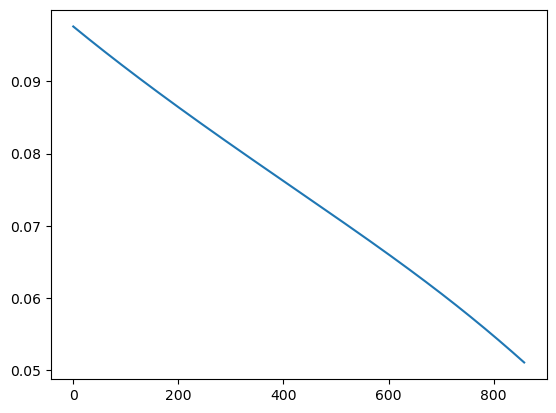

In [693]:
plt.plot(db2_track)

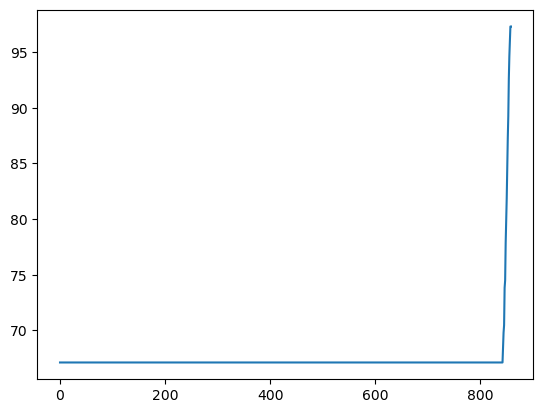

In [686]:
plt.plot(Accuracy_track)

In [689]:
#np.where(Accuracy_track>90)

(array([854, 855, 856, 857, 858], dtype=int64),)

In [690]:
#Accuracy_track[Accuracy_track>90]

array([92.61744966, 94.63087248, 95.97315436, 97.31543624, 97.31543624])